# '따릉이' 시간대별 이용정보 분석 (23.04)

## 분석한 파일명 : 서울특별시 공공자전거 이용정보(시간대별)_2304.csv

## colab : matplotlib 한글 인식

In [1]:
### colab : matplotlib 한글 인식 (방법1)

# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and direc

In [1]:
### 폰트 설치 후에 '런타임' > '세션 다시 시작' 하여 --> 여기서부터 ("이후 셀 실행")

### 설치한 나눔폰트로 설정 변경하기

## 필요한 함수 / 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 폰트 지정 : 나눔바른고딕 폰트로 바꾸기
plt.rc('font', family='NanumBarunGothic')

# # 폰트 지정 : Malgun Gothic 폰트로 바꾸기
# plt.rc('font', family='Malgun Gothic')

# 설정된 font.family 확인하기
plt.rcParams['font.family']

['NanumBarunGothic']

## 데이터 불러오기

### ZIP 파일 불러와서 압축 해제 -> csv 파일

In [2]:
### ZIP 파일 불러와서 압축 해제 -> csv 파일
# !unzip '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/서울특별시 공공자전거 이용정보(시간대별)_2304.zip' \
#         -d '/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)'


In [3]:
# 파일 경로 설정
file1_path='/content/drive/MyDrive/KDT/프로젝트/mini프로젝트(0115~0123)/data/서울특별시 공공자전거 이용정보(시간대별)_2304.csv'
# pd.readcsv() -> DataFrame 생성
df = pd.read_csv(file1_path, encoding='cp949')


In [4]:
# 내용 확인하기
print(df.shape)
print('-'*80)
df.iloc[2000:2002, :]

(3601047, 12)
--------------------------------------------------------------------------------


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2023-04-01,0,2613,2613. 잠실나들목,일일권,NaN,20대,2,271.74,2.14,9222.72,55
2001,2023-04-01,0,2620,2620. 송파나루역 4번 출구옆,일일권,NaN,20대,1,142.34,1.04,4493.10,20


## 데이터 전처리

### 데이터 구성

데이터 량이 (3601047, 12) 많아서 '대여소번호', '대여소명', '대여구분' 컬럼을 제외하고 분석함

In [5]:
### 분석데이터 구성
'''
데이터 량이 (3601047, 12) 많아서 '대여소번호', '대여소명', '대여구분코드' 컬럼을 제외하고 분석함
'''
df_bike = df.drop(['대여소번호', '대여소명', '대여구분코드'], axis=1)
df_bike.iloc[2000:2002, :]


,대여일자,대여시간,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
2000,2023-04-01,0,NaN,20대,2,271.74,2.14,9222.72,55
2001,2023-04-01,0,NaN,20대,1,142.34,1.04,4493.10,20


### 누락 데이터 확인 및 처리

In [6]:
### 누락 데이터 확인
print(df_bike.isnull().sum())

대여일자             0
대여시간             0
성별         1127323
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리(M)          0
이용시간(분)          0
dtype: int64


#### 성별 컬럼 -> 누락 데이터 -> 'O' (other) 대체

In [7]:
### 성별 컬럼 -> 누락 데이터 -> 'O' (other) 대체

''' 성별을 제대로 표시하지 않은 데이터를 dropna() 처리하거나
다른 값으로 대체 필요 -> 우선 데이터가 많아서 다른 값으로 대체함
'''
# df_bike.loc[:, '성별'].fillna('O', inplace=True)

# 누락치 dropna() 처리하는 것으로 변경
df_bike.dropna(subset=['성별'],inplace=True)

In [8]:
### index -> reset 필요 -> reset_index()

df_bike.reset_index(drop=True, inplace=True) # drop=True 를 사용해서 기존 index가 남지 않도록 한다

# 결과 확인하기
print(df_bike)
# 대체 후 누락 데이터의 수 확인
print(df_bike.isnull().sum())

               대여일자  대여시간 성별 연령대코드  이용건수     운동량   탄소량  이동거리(M)  이용시간(분)
0        2023-04-01     0  F  ~10대     1   51.69  0.47  2008.02       16
1        2023-04-01     0  F  ~10대     1   18.41  0.17   715.38        5
2        2023-04-01     0  F  ~10대     1   13.93  0.15   639.79        3
3        2023-04-01     0  F  ~10대     1   48.82  0.44  1896.56       13
4        2023-04-01     0  F  ~10대     1   19.60  0.26  1099.80        8
...             ...   ... ..   ...   ...     ...   ...      ...      ...
2473719  2023-04-30    23  M    기타     1   56.37  0.51  2190.00       11
2473720  2023-04-30    23  M    기타     1   53.77  0.40  1740.86       11
2473721  2023-04-30    23  M    기타     1   17.68  0.17   720.00        4
2473722  2023-04-30    23  M    기타     1   57.32  0.45  1930.00       39
2473723  2023-04-30    23  M    기타     1  107.71  0.79  3400.00       81

[2473724 rows x 9 columns]
대여일자       0
대여시간       0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이동거리(

### Feature Engineering

In [9]:
#### 기본 정보 확인 후 컬럼별 처리

In [10]:
### 기본 정보 확인
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473724 entries, 0 to 2473723
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   성별       object 
 3   연령대코드    object 
 4   이용건수     int64  
 5   운동량      object 
 6   탄소량      object 
 7   이동거리(M)  float64
 8   이용시간(분)  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 169.9+ MB


#### object(str) 타입 컬럼을 numeric 타입으로 변환

#### 성별 컬럼

In [11]:
### 성별 컬럼 확인하는 방법 (3가지 방법)
# df_bike.loc[:,'성별'].unique() # 방법1
df_bike['성별'].unique() # 방법 2
# df_bike.loc[:,'성별'].value_counts() # 방법 3

array(['F', 'M', 'm', 'f'], dtype=object)

In [12]:
# # 성별 컬럼 -> replace()
# df_bike.replace({'성별': {'M':1,'m':1,'F':2,'f':2,'O':3}}, inplace=True)

### 굳이 숫자로 replace 하지 말고, 소문자 -> 대문자로 변경하는 것이 나을듯...
df_bike.replace({'성별': {'m':'M','f':'F'}}, inplace=True)

# 처리 후에 결과 확인
df_bike.loc[:,'성별'].value_counts().sort_index()

F     977875
M    1495849
Name: 성별, dtype: int64

#### 연령대코드 컬럼

In [13]:
# 연령대코드 컬럼 처리하기
df_bike.loc[:,'연령대코드'].value_counts()

20대      721298
30대      601068
40대      385067
50대      261396
기타       224078
~10대     179919
60대       87027
70대이상     13871
Name: 연령대코드, dtype: int64

In [14]:
# 연령대코드 컬럼 -> replace()
'''
20대 : 2
30대 : 3
40대 : 4
50대 : 5
60대 : 6
70대이상 : 7
~10대: 1
기타 : 9
'''

# 굳이 replace 할 필요가 없을듯요

# df_bike.replace({'연령대코드': \
#     {'20대':2,'30대':3,'40대':4,'50대':5,'60대':6,'70대이상':7,'~10대':1,'기타':9}},\
#     inplace=True)

# replace() 결과 확인하기
df_bike.loc[:,'연령대코드'].value_counts().sort_index()


20대      721298
30대      601068
40대      385067
50대      261396
60대       87027
70대이상     13871
~10대     179919
기타       224078
Name: 연령대코드, dtype: int64

##### 운동량, 탄소량 컬럼 numeric으로 형변환

In [15]:
### 운동량, 탄소량 컬럼 -> '\N' -> -1 로 대체
# 운동량, 탄소량 컬럼을 수치형 데이터로 변경하려고 하면 '\N' 때문에 error 발생되어 -1 로 대체함
df_bike.iloc[:,5] = df_bike.iloc[:,5].replace(r'\N',-1) # 운동량
df_bike.iloc[:,6] = df_bike.iloc[:,6].replace(r'\N',-1) # 탄소량

### 운동량, 탄소량 컬럼 numeric으로 형변환
df_bike["운동량"] = pd.to_numeric(df_bike["운동량"]) # 운동량
df_bike.iloc[:, 6] = df_bike.iloc[:, 6].astype(float) # 탄소량

In [16]:
# 형변환 후 기본 정보 확인하기
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473724 entries, 0 to 2473723
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   성별       object 
 3   연령대코드    object 
 4   이용건수     int64  
 5   운동량      float64
 6   탄소량      float64
 7   이동거리(M)  float64
 8   이용시간(분)  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 169.9+ MB


## 데이터 탐색

### [1-1] 시간대별 대여건수

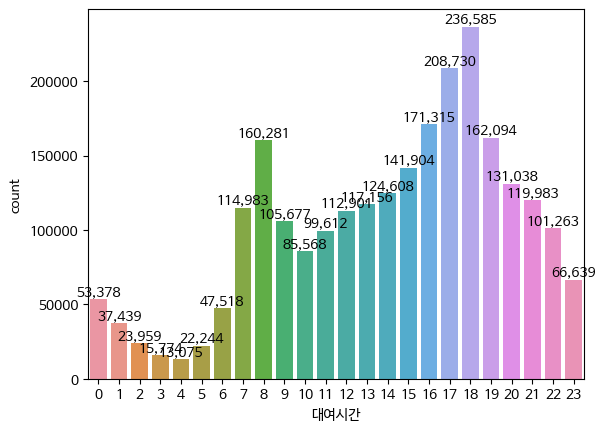

In [17]:
# 시간대별 대여건수
count = df_bike.loc[:,'대여시간'].value_counts().sort_index()
# print(f'시간대별 대여건수 : \n{count}')
# print('-'*80)

# 시간대별 대여건수 시각화
ax = sns.countplot(data=df_bike, x='대여시간')

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

#### 시간대별 대여건수 분석 결과
    O 출근 시간대인 07시~09시,

    O 퇴근 시간대인 16시~20시

    대여건수가 높게 나타남

### [1-2] 시간대별 이용건수

In [18]:
### 시간대별 이용건수 탐색을 위한 컬럼만 DataFrame 구성 -> df_bike_time

# df_bike_time = df_bike.loc[:, ('대여시간','대여소번호','대여소명','이용건수')]
# <-- 나중에 대여소별 통계를 산출할 때는 이 컬럼들 사용하자

df_bike_time = df_bike.loc[:, ('대여시간','이용건수')]
df_bike_time

,대여시간,이용건수
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2473719,23,1
2473720,23,1
2473721,23,1
2473722,23,1


In [19]:
# 대여시간별 이용건수를 그룹핑하여 -> 그룹핑 결과 합계
use_per_hour = df_bike_time[['이용건수']].groupby(df_bike_time['대여시간']).sum()
# use_per_hour = use_per_hour.reset_index(drop=False)

# top5 확인해 보기
print(use_per_hour['이용건수'].nlargest(5))


대여시간
18    287129
17    244485
16    196715
8     192167
19    184629
Name: 이용건수, dtype: int64


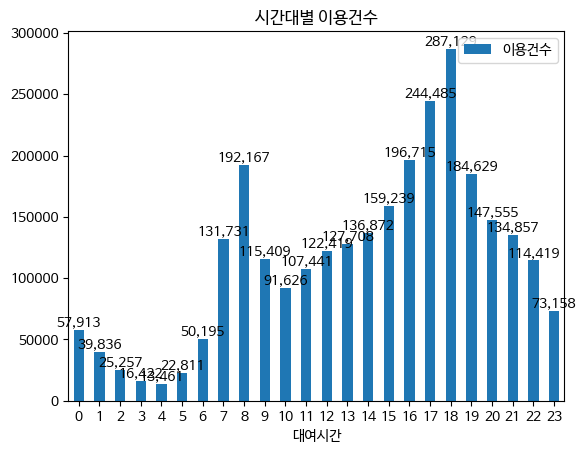

In [20]:
### 시간대별 이용건수 시각화

ax = use_per_hour.plot(kind='bar', title="시간대별 이용건수", rot=0)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')
plt.show()

#### 시간대별 이용건수 분석 결과
    O 출근 시간대인 07시~09시,

    O 퇴근 시간대인 16시~20시

    이용건수가 높게 나타남

### [2] 요일별 이용건수

In [21]:
### [2-1] 요일별 이용건수
### 요일별 이용건수 탐색을 위한 컬럼만 DataFrame 구성 -> df_bike_day
df_bike_day = df_bike.loc[:, ('대여일자','대여시간','이용건수')]

# 대여일자를 datetime으로 형변환해서 weekday 추가
df_bike_day['일자(date)'] = pd.to_datetime(df_bike_day['대여일자'])
df_bike_day['weekday'] = df_bike_day['일자(date)'].dt.weekday
# df_bike_day['day_name'] = df_bike_day['일자(date)'].dt.day_name()

# # # 0~6번 인덱스 위치에 각 한글 요일 이름이 담긴 리스트
# weekday_list = ['월', '화', '수', '목', '금', '토', '일']

# # apply 함수로 숫자 -> 요일 이름으로 변환
# df_bike_day['요일'] = df_bike_day.apply(lambda x : weekday_list[x['weekday']], axis=1)

# 결과 확인하기
df_bike_day

,대여일자,대여시간,이용건수,일자(date),weekday
0,2023-04-01,0,1,2023-04-01,5
1,2023-04-01,0,1,2023-04-01,5
2,2023-04-01,0,1,2023-04-01,5
3,2023-04-01,0,1,2023-04-01,5
4,2023-04-01,0,1,2023-04-01,5
...,...,...,...,...,...
2473719,2023-04-30,23,1,2023-04-30,6
2473720,2023-04-30,23,1,2023-04-30,6
2473721,2023-04-30,23,1,2023-04-30,6
2473722,2023-04-30,23,1,2023-04-30,6


In [22]:
df_bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473724 entries, 0 to 2473723
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일자      object        
 1   대여시간      int64         
 2   이용건수      int64         
 3   일자(date)  datetime64[ns]
 4   weekday   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 94.4+ MB


In [23]:
# 요일별 이용건수를 그룹핑하여 -> 그룹핑 결과 합계
use_per_weekday = df_bike_day[['이용건수']].groupby(df_bike_day['weekday']).sum()

# top3 확인해 보기
# print(use_per_weekday['이용건수'].nlargest(3))
print(use_per_weekday['이용건수'])

weekday
0    463039
1    301719
2    345022
3    369382
4    448549
5    412832
6    452911
Name: 이용건수, dtype: int64


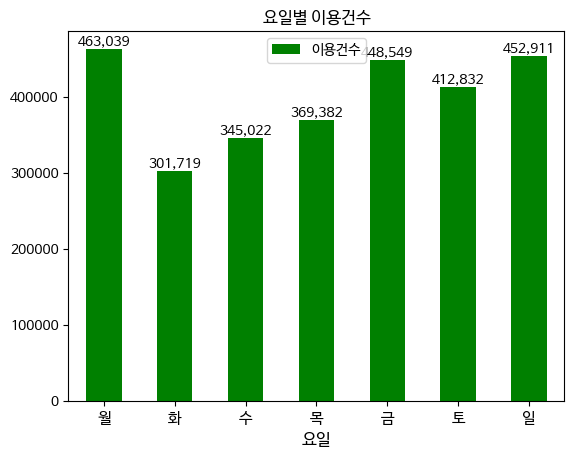

In [24]:
### 요일별 이용건수 시각화

ax = use_per_weekday.plot(kind='bar', title="요일별 이용건수", color='g', rot=0)
day_order = ["월", "화", "수", "목", "금", "토", "일"]
ax.set_xticklabels(day_order, fontsize=11)
ax.set_xlabel('요일', fontsize=12)

# 건수 표시 (수치가 있어서 불편하면 삭제하기)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()

### [3] '성별' 대여건수


성별 대여건수 : 
F     977875
M    1495849
Name: 성별, dtype: int64
--------------------------------------------------------------------------------
성별 대여 비율 : 
F    39.530481
M    60.469519
Name: 성별, dtype: float64
--------------------------------------------------------------------------------


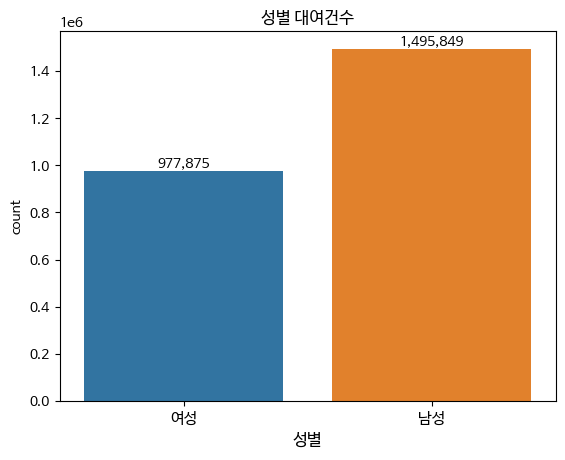

In [25]:
# 성별 대여건수
count = df_bike.loc[:,'성별'].value_counts().sort_index()
print(f'\n성별 대여건수 : \n{count}')
print('-'*80)

# 성별 대여 비율
ratio = df_bike.loc[:,'성별'].value_counts(normalize=True).sort_index()
print(f'성별 대여 비율 : \n{ratio*100}')
print('-'*80)

# 성별 대여건수 시각화
ax = sns.countplot(data=df_bike, x='성별')
ax.set(title='성별 대여건수')
ax.set_xticklabels(["여성", "남성"], fontsize=11)
ax.set_xlabel('성별', fontsize=12)


# 건수 표시 (수치가 있어서 불편하면 삭제해도 됨)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()


#### 성별 대여건수 분석 결과
    O 남성 비율이 42%

    O 여성 비율이 27% 로 남성이 조금 더 많이 이용한 것으로 나타남

    (성별을 정확히 기재하지 않은 데이터가 31% 여서 아쉬움)

### [4] '연령대별' 대여건수


연령대별 대여건수 : 
20대      721298
30대      601068
40대      385067
50대      261396
60대       87027
70대이상     13871
~10대     179919
기타       224078
Name: 연령대코드, dtype: int64
--------------------------------------------------------------------------------
연령대별 비율 : 
20대      0.291584
30대      0.242981
40대      0.155663
50대      0.105669
60대      0.035181
70대이상    0.005607
~10대     0.072732
기타       0.090583
Name: 연령대코드, dtype: float64
--------------------------------------------------------------------------------


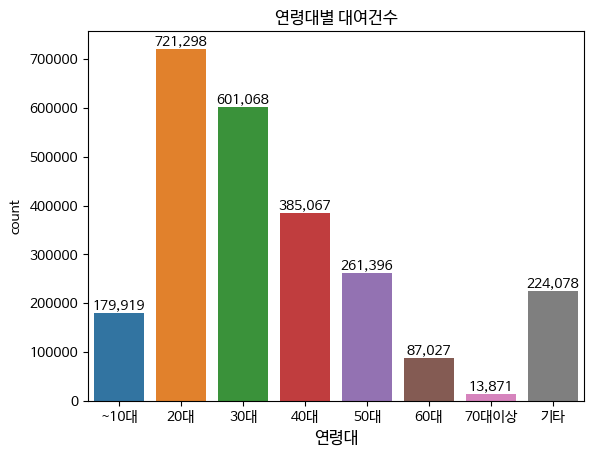

In [26]:
# 연령대별 대여건수
count = df_bike.loc[:,'연령대코드'].value_counts().sort_index()
print(f'\n연령대별 대여건수 : \n{count}')
print('-'*80)
# 연령대별 비율
ratio = df_bike.loc[:,'연령대코드'].value_counts(normalize=True).sort_index()
print(f'연령대별 비율 : \n{ratio*1}')
print('-'*80)

# 연령대 대여건수 시각화
ax = sns.countplot(data=df_bike, x='연령대코드')
ax.set(title='연령대별 대여건수')
ax.set_xlabel('연령대', fontsize=12)

# 건수 표시 (수치가 있어서 불편하면 삭제해도 됨)
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.show()


#### 연령대별 이용건수 분석 결과
    O 20대 (33%) 가 가장 높은 이용륭을 보이고 있고,'

    O 30대 (25%) > 40대 (15%) 순으로

    O 20대 ~ 40대가 가장 활발하게 이용한 것으로 나타남

### [5] '성별'과 운동량, 탄소량, 이동거리, 이동시간 관계

In [27]:
# 성별 컬럼 -> replace()
df_bike_numeric = df_bike.copy()
df_bike_numeric.replace({'성별': {'M':1,'F':2}}, inplace=True)

# 처리 후에 결과 확인
df_bike_numeric.loc[:,'성별'].value_counts().sort_index()

1    1495849
2     977875
Name: 성별, dtype: int64

In [28]:
### '성별'과 운동량, 탄소량, 이동거리, 이동시간 관계 -> pd.pivot_table()

table1_1 = pd.pivot_table(df_bike_numeric, index=['성별'], \
                        values=['운동량', '탄소량','이동거리(M)','이용시간(분)' ], \
                        aggfunc=np.mean)
# print(table1_1)
# print('-'*80)

table1_2 = pd.pivot_table(df_bike_numeric, index=['성별'], \
                        values=['운동량', '탄소량','이동거리(M)','이용시간(분)' ], \
                        aggfunc=np.mean).round(2) # 소숫점 2자리
table1_2

          운동량      이동거리(M)    이용시간(분)       탄소량
성별                                             
1   83.439388  2899.622099  23.845633  0.669372
2   70.013000  2968.658799  26.669149  0.684930
--------------------------------------------------------------------------------


,운동량,이동거리(M),이용시간(분),탄소량
성별,,,,
1,83.44,2899.62,23.85,0.67
2,70.01,2968.66,26.67,0.68


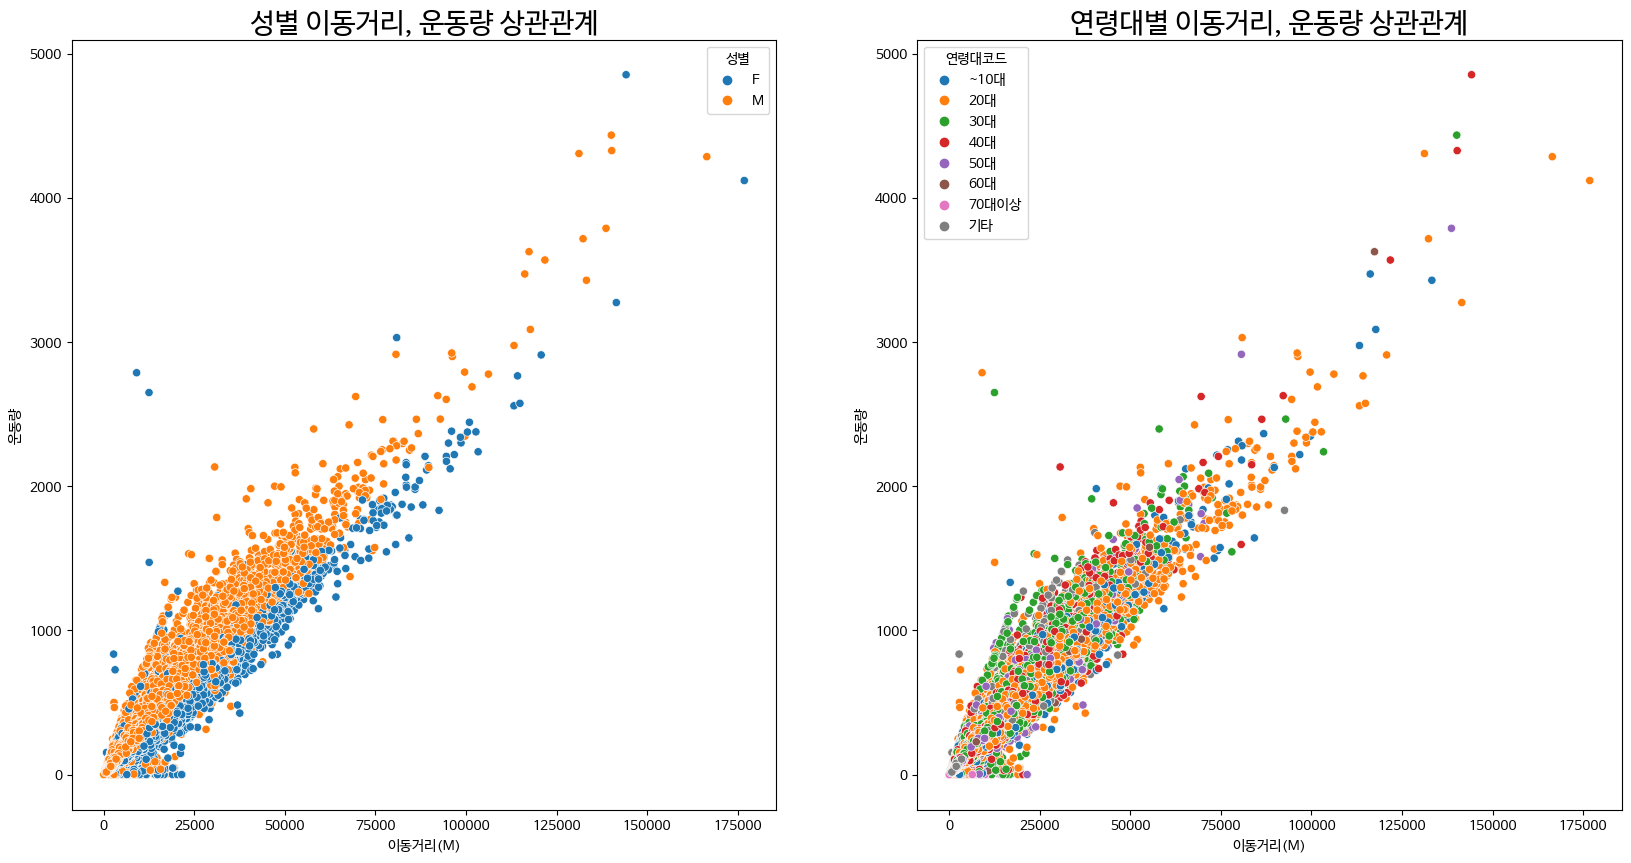

In [40]:
### 성별 & 연령대별 이동거리, 운동량 산점도 (나란이 표시하기)

fig, ax = plt.subplots(1, 2, figsize=(20,10))

# 성별
sns.scatterplot(data=df_bike, x='이동거리(M)', y='운동량', hue='성별', ax=ax[0])
ax[0].set_title('[성별] 이동거리, 운동량 상관관계', size=20)

# 연령대별
sns.scatterplot(data=df_bike, x='이동거리(M)', y='운동량', hue='연령대코드', ax=ax[1])
ax[1].set_title('[연령대별] 이동거리, 운동량 상관관계', size=20)

plt.show()

In [ ]:
### 성별 이동거리, 운동량 산점도 추가하기 # 시간 많이 걸림

# sns.scatterplot(data=df_bike, x='이동거리(M)', y='운동량', hue='성별')
# plt.title('성별 이동거리, 운동량 상관관계 (산점도)')
# plt.show()

### [6] '연령대'와 운동량, 탄소량, 이동거리, 이동시간 관계

In [30]:
### '연령대'와 운동량, 탄소량 관계  -> pd.pivot_table()

df_bike_numeric.replace({'연령대코드': \
    {'20대':2,'30대':3,'40대':4,'50대':5,'60대':6,'70대이상':7,'~10대':1,'기타':9}}, inplace=True)

table2_1 = pd.pivot_table(df_bike_numeric, index=['연령대코드'], \
                        values=['운동량', '탄소량','이동거리(M)','이용시간(분)' ], \
                        aggfunc=np.mean)
# print(table2_1)
# print('-'*80)

table2_2 = pd.pivot_table(df_bike_numeric, index=['연령대코드'], \
                        values=['운동량', '탄소량','이동거리(M)','이용시간(분)' ], \
                        aggfunc=np.mean).round(2) # 소숫점 2자리
table2_2


             운동량      이동거리(M)    이용시간(분)       탄소량
연령대코드                                             
1      65.803718  2555.061695  22.654506  0.589090
2      76.917039  2952.119983  24.716876  0.681160
3      79.858566  2960.683692  24.907550  0.683291
4      84.816893  3065.883626  26.646210  0.708091
5      81.857228  3037.227577  25.760249  0.701495
6      78.484388  2963.641829  27.188137  0.684397
7      73.005403  2743.842226  29.100714  0.632409
9      71.656101  2683.320034  22.801261  0.618889
--------------------------------------------------------------------------------


,운동량,이동거리(M),이용시간(분),탄소량
연령대코드,,,,
1,65.80,2555.06,22.65,0.59
2,76.92,2952.12,24.72,0.68
3,79.86,2960.68,24.91,0.68
4,84.82,3065.88,26.65,0.71
5,81.86,3037.23,25.76,0.70
6,78.48,2963.64,27.19,0.68
7,73.01,2743.84,29.10,0.63
9,71.66,2683.32,22.80,0.62


In [ ]:
### 연령대별 이동거리, 운동량 산점도 추가하기 # 시간 많이 걸림

# sns.scatterplot(data=df_bike, x='이동거리(M)', y='운동량', hue='연령대코드')
# plt.title('연령대별 이동거리, 운동량 상관관계 (산점도)')
# plt.show()

### [7] 상관관계 heatmap 추가하기

In [ ]:
### 성별, 연령대코드 컬럼 numeric으로 형변환
df_bike_numeric["성별"] = pd.to_numeric(df_bike_numeric["성별"])
df_bike_numeric["연령대코드"] = pd.to_numeric(df_bike_numeric["연령대코드"])

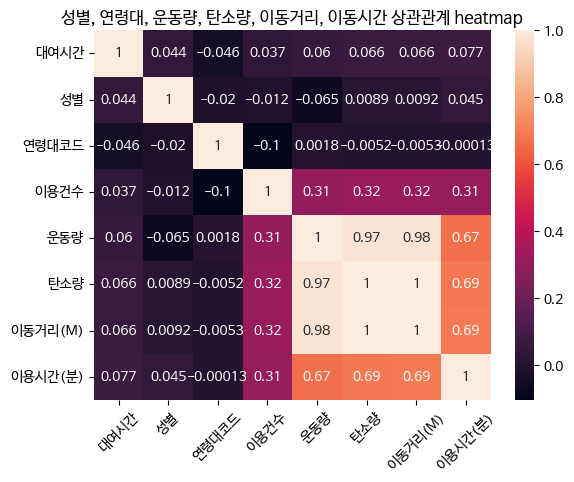

In [33]:
### 상관관계 heatmap 추가하기

sns.heatmap(df_bike_numeric.corr(), annot=True)
plt.title('성별, 연령대, 운동량, 탄소량, 이동거리, 이동시간 상관관계 heatmap')
plt.xticks(rotation=45)
plt.show()

### [8] 운동량과 탄소량 산점도 추가하기

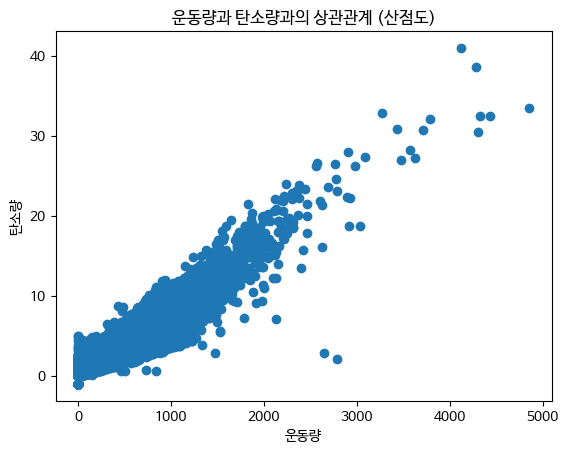

In [34]:
### 운동량과 탄소량 산점도 추가하기

plt.scatter(df_bike_numeric['운동량'], df_bike_numeric['탄소량'])
plt.xlabel('운동량')
plt.ylabel('탄소량')
plt.title('운동량과 탄소량과의 상관관계 (산점도)')
plt.show()

### 상관관계 pairplot 추가하기 -> 삭제

In [35]:
# ### 상관관계 pairplot 추가하기 (데이터도 크고, 시간이 많이 걸려서 사용하지 말기)

# sns.pairplot(df_bike_numeric,
#              hue='성별',
#              kind='reg',
#             #  palette='husl',
#             #  markers=['o','s', 'd'],
#              plot_kws={'line_kws':{'color':'red'}})